In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
class OrnsteinUhlenbeck():
    def __init__(self, mu=0, theta=1, sigma=1, dt=0.01):
        self.mu = mu
        self.theta = theta
        self.sigma = sigma
        self.dt = dt

    def update(self, t, x):
        dx = (self.mu - x)*self.theta*self.dt + self.sigma*np.sqrt(self.dt)*np.random.standard_normal()
        return t + self.dt, x + dx
    
    def sequence(self, length=100, x0=0):
        t = 0
        x = x0
        seq = [x0]
        for i in range(length - 1):
            t, x = self.update(t, x)
            seq.append(x)
        return np.array(seq)

In [3]:
ou = OrnsteinUhlenbeck()

traj = [(0,0)]

for i in range(10):
    traj.append(ou.update(*traj[-1]))

traj = np.array(traj)

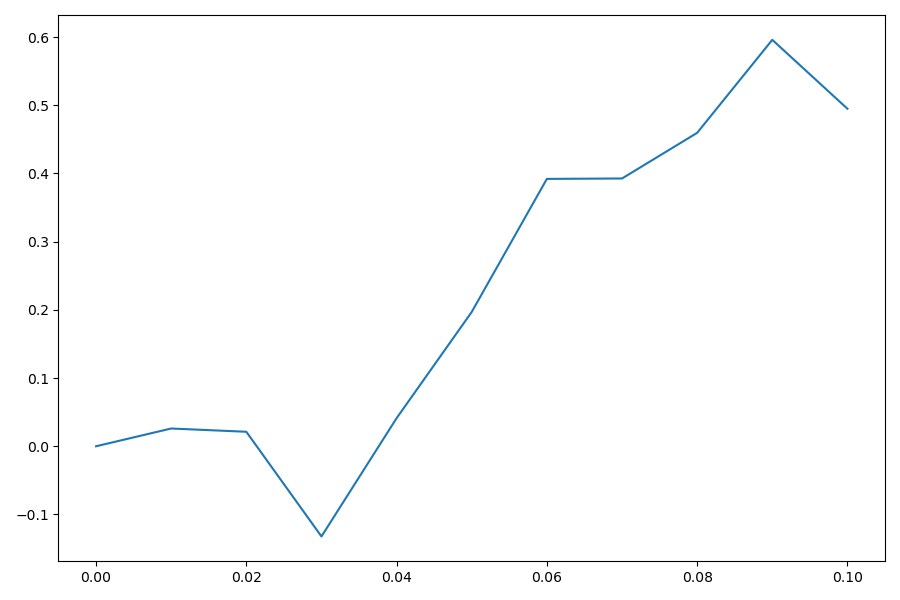

In [4]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(traj[:,0], traj[:,1])

fig.tight_layout()

In [5]:
def place_along_line(z:np.ndarray, start:tuple, end:tuple, touches_endpoints=False):
    x1, y1 = start
    x2, y2 = end
    if touches_endpoints:
        z = z - z[0]
        z = z - np.linspace(0,1,len(z))*z[-1]

    points = np.zeros((len(z),2), dtype=float) + np.array((x1,y1))
    vec_par = np.array((x2 - x1, y2 - y1))/(len(z) - 1)
    vec_perp = np.array((-vec_par[1], vec_par[0]))
    for i in range(len(z)):
        points[i] += z[i] * vec_perp + i*vec_par
    return points

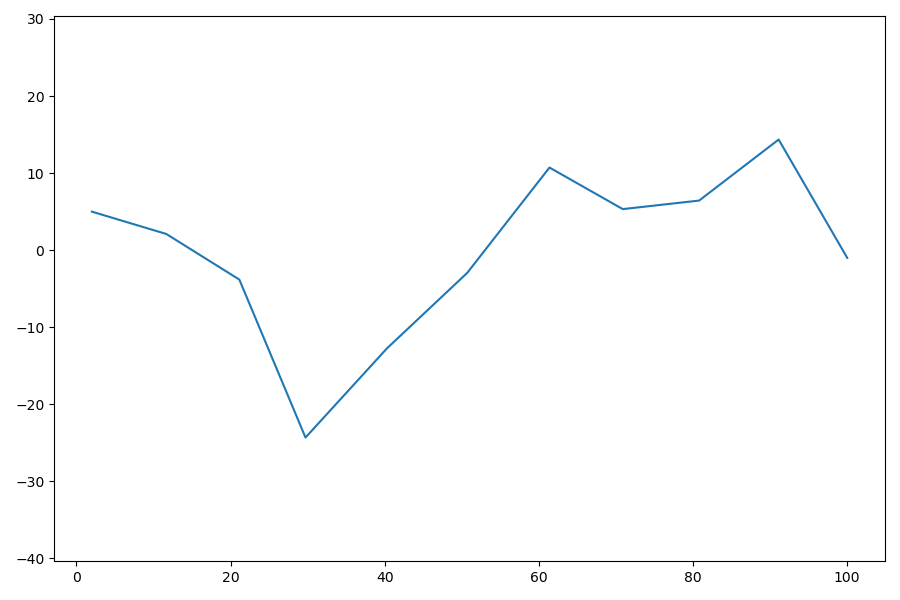

In [6]:
points = place_along_line(10*traj[:,1], (2,5), (100,-1), touches_endpoints=True)

plt.close(2)
fig, ax = plt.subplots(num=2, figsize=(9,6))
plt.axis('equal')

plt.plot(points[:,0], points[:,1])

fig.tight_layout()

In [7]:
def recursive_fractal_segment(start, end, zs=10, iterations=None, regenerate=True, total_points=1000, **kwargs):
    nz = zs if isinstance(zs, int) else len(zs)
    if iterations is None:
        iterations = int(np.log(total_points)/np.log(nz))
        print(f'{iterations = }')
    if isinstance(zs,int) or regenerate:
        ou = OrnsteinUhlenbeck(**kwargs)
        zs = ou.sequence(length=nz)
        # print(zs)
    points =  place_along_line(zs, start, end, touches_endpoints=True)
    
    if iterations == 1:
        return points
    else:
        ps = []
        for i in range(points.shape[0] - 1):
            _ps = recursive_fractal_segment(points[i], points[i+1], zs=zs, iterations=iterations-1, regenerate=regenerate, **kwargs)
            ps.append(_ps[:-1])
        ps.append(_ps[-1:])
        return np.concatenate(ps, axis=0)
    

iterations = 9
iterations = 9
iterations = 9
iterations = 9
iterations = 9


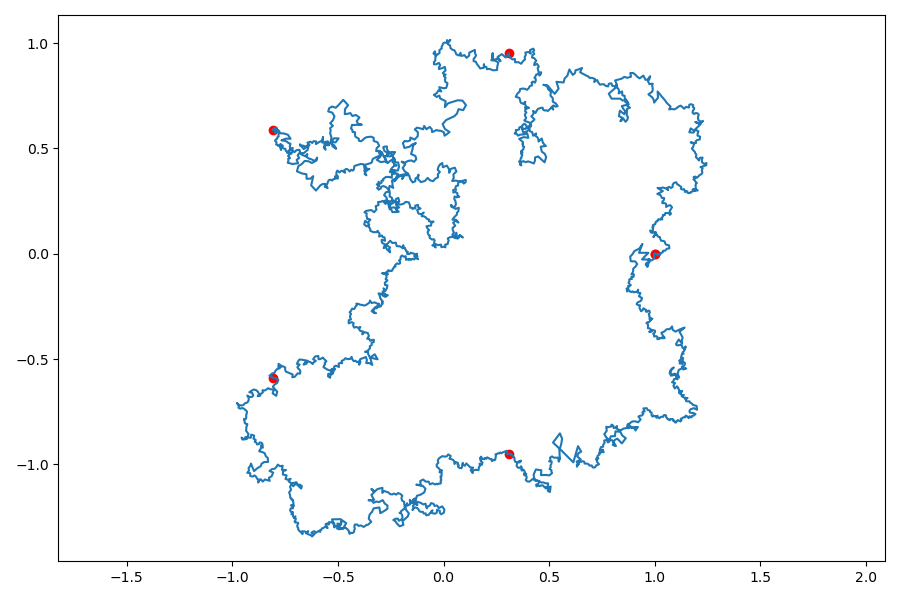

In [22]:
plt.close(3)
fig, ax = plt.subplots(num=3, figsize=(9,6))
plt.axis('equal')

# points = [(0,0), (0,1), (1,1), (1,0), (0,0)]
# points = [(0,0), (1,1)]
# points = [(0,0), (0,0.4), (1,0.5), (0,0.6), (0,1)]
# points = np.outer(np.arange(4), np.ones(2))
cplx = np.exp(1j*np.linspace(0,2*np.pi,6)) ; points = np.stack([np.real(cplx), np.imag(cplx)]).T
points = np.array(points)
plt.scatter(points[:,0], points[:,1], color='red')

ps = []
for i in range(len(points) - 1):
    segment_length = np.linalg.norm(points[i+1] - points[i])
    total_points = int(np.ceil(segment_length))*10000
    _ps = recursive_fractal_segment(points[i], points[i+1], zs=3, total_points=total_points, regenerate=True, sigma=10, theta=1)
    ps.append(_ps[:-1])
ps.append(_ps[-1:])
points = np.concatenate(ps, axis=0)

plt.plot(points[:,0], points[:,1])

fig.tight_layout()